# Segunda avaliação de TESI
João Carlos B. Santos  
Matheus Barros

# Informações sobre o dataset
#### Título: [Haberman's Survival Data (Dados de Sobrevivência de Haberman)](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)
#### Fontes:
(a) Doador: Tjen-Sien Lim (limt@stat.wisc.edu)  
(b) Data: 4 de março de 1999

#### Uso passado:
1. Haberman, S. J. (1976). Residuais Generalizados para Modelos Log-Lineares, Anais da 9ª Conferência Internacional de Biometria, Boston, pp. 104-122.
2. Landwehr, J. M., Pregibon, D., e Shoemaker, A. C. (1984), Modelos Gráficos para Avaliação de Modelos de Regressão Logística com discussão), Jornal da Associação Estatística Americana 79: 61-83.
3. Lo, W.-D. (1993). Árvores de Regressão Logística, tese de doutorado, Departamento de Estatística, Universidade de Wisconsin, Madison, WI.

#### Informação Relevante:
O conjunto de dados contém casos de um estudo realizado entre **1958** e **1970**, no Hospital Billings, da Universidade de Chicago, sobre a sobrevida de pacientes submetidos à cirurgia para câncer de mama.

#### Número de Instâncias: 306
#### Número de Atributos: 4 (incluindo o atributo de classe)
#### Informações sobre Atributos:
1. Idade do paciente no momento da operação;
2. Ano de operação do paciente (ano - 1900);
3. Número de nós axilares positivos detectados;
4. Status de Sobrevivência (atributo de classe);  
    1 = o paciente sobreviveu 5 anos ou mais;  
    2 = o paciente morreu dentro de 5 anos.

#### Atributos ausentes: Nenhum

### Todos os imports necessários

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from scipy.stats import bayes_mvs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC



### Carregando o csv com os dados e exibindo as 5 primeiras linhas

In [2]:
# df = Data frame
df = pd.read_csv('haberman_csv.csv')
df.head(5)

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Exibindo as 5 últimas linhas

In [3]:
df.tail(5)

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


### Exibindo as informações sobre o dataframe com info() e describe()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_patient_at_time_of_operation           306 non-null int64
Patients_year_of_operation                    306 non-null int64
Number_of_positive_axillary_nodes_detected    306 non-null int64
Survival_status                               306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [5]:
df.describe()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Exibindo alguns dados referentes a idade dos pacientes (idade menor, maior, média)

In [6]:
# Exibindo a idade dos pacientes na data da cirurgia
df['Age_of_patient_at_time_of_operation']

0      30
1      30
2      30
3      31
4      31
5      33
6      33
7      34
8      34
9      34
10     34
11     34
12     34
13     34
14     35
15     35
16     36
17     36
18     37
19     37
20     37
21     37
22     37
23     37
24     38
25     38
26     38
27     38
28     38
29     38
       ..
276    67
277    67
278    67
279    68
280    68
281    69
282    69
283    69
284    69
285    70
286    70
287    70
288    70
289    70
290    70
291    70
292    71
293    72
294    72
295    72
296    72
297    73
298    73
299    74
300    74
301    75
302    76
303    77
304    78
305    83
Name: Age_of_patient_at_time_of_operation, Length: 306, dtype: int64

In [7]:
# Exibindo todos os valores únicos para a idade dos pacientes
df['Age_of_patient_at_time_of_operation'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [8]:
# Exibindo a menor idade
df['Age_of_patient_at_time_of_operation'].min()

30

In [9]:
# Exibindo a maior idade
df['Age_of_patient_at_time_of_operation'].max()

83

In [10]:
# Exibindo a media das idades
df['Age_of_patient_at_time_of_operation'].mean()

52.45751633986928

In [11]:
# Exibindo idades nulas
df[df['Age_of_patient_at_time_of_operation'].isnull()]

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status


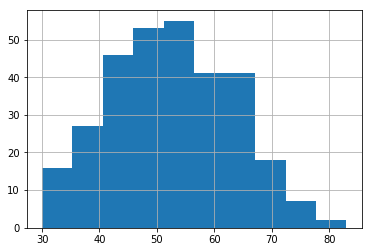

In [21]:
# Histograma das idades dos pacientes
df['Age_of_patient_at_time_of_operation'].hist()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f461d82e2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f461d82e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f461d82e160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f461d82efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f461d83d358>],
 'means': []}

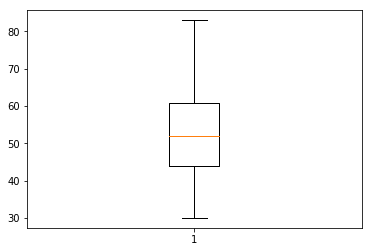

In [23]:
# Média das i
plt.boxplot(df['Age_of_patient_at_time_of_operation'], showfliers=True)

### Exibindo dados referentes ao ano que foi realizada a cirurgia.

In [18]:
# Ano da Primeira cirurgia
df['Patients_year_of_operation'].min()

58

In [19]:
# Ano da última cirurgia
df['Patients_year_of_operation'].max()

69

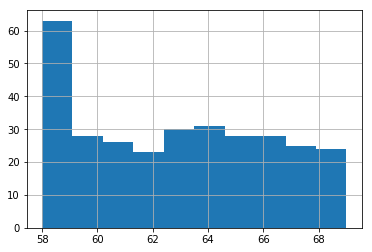

In [22]:
# Histograma dos anos em que foram realizadas as cirgurgias
df['Patients_year_of_operation'].hist()
plt.show()

### Exibindo todas as colunas e buscando dados nulos

In [13]:
# Exibindo todas as colunas existentes
df.columns

Index(['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')

In [14]:
# Procurando por dados nulos nas colunas
for coluna in df.columns:
    print(coluna, 'Nulos: ', df[coluna].isnull().sum())

Age_of_patient_at_time_of_operation Nulos:  0
Patients_year_of_operation Nulos:  0
Number_of_positive_axillary_nodes_detected Nulos:  0
Survival_status Nulos:  0


### Treinando os dados e avaliando os resultados

In [15]:
# Criando as variáveis x e y para treinamento
# FIXME: Perguntas para avaliarmos os dados:
# O paciente tinha quantos anos na época da cirurgia?
# O paciente 
x = df[['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected']]
y = df["Survival_status"]

# Treinando os dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

# Verificando o tamanho dos dados
print('X:', len(x))
print('Y:', len(y))

X: 306
Y: 306


#### Usando naive bayes

In [16]:
modelo = MultinomialNB()

# fit()
print(modelo.fit(x_treino, y_treino))
# Tamanho dos dados de treino
print("X treino: ", len(x_treino))
print("Y treino: ", len(y_treino))
# Verificando o score
print('Score:', modelo.score(x_teste, y_teste))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
X treino:  229
Y treino:  229
Score: 0.6103896103896104


In [17]:
d = pd.get_dummies(x)
d.head(10)

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
5,33,58,10
6,33,60,0
7,34,59,0
8,34,66,9
9,34,58,30
